Neural Network Linear and Non-Linear Projections

<string>:112: SyntaxWarning: invalid escape sequence '\{'
<>:112: SyntaxWarning: invalid escape sequence '\{'
<>:112: SyntaxWarning: invalid escape sequence '\o'
<string>:112: SyntaxWarning: invalid escape sequence '\{'
<>:112: SyntaxWarning: invalid escape sequence '\{'
<>:112: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Spark\AppData\Local\Temp\ipykernel_14696\1890588893.py:112: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f"F:\output\experimental\{ticker}_proj_lstm.png")
C:\Users\Spark\AppData\Local\Temp\ipykernel_14696\1890588893.py:112: SyntaxWarning: invalid escape sequence '\o'
  plt.savefig(f"F:\output\experimental\{ticker}_proj_lstm.png")
[*********************100%%**********************]  1 of 1 completed
D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  supe

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2438
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0916
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0275
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0529
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0350
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0242
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0308
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0296
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0233
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0228
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0266
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0227
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0267
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0267
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0216
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━

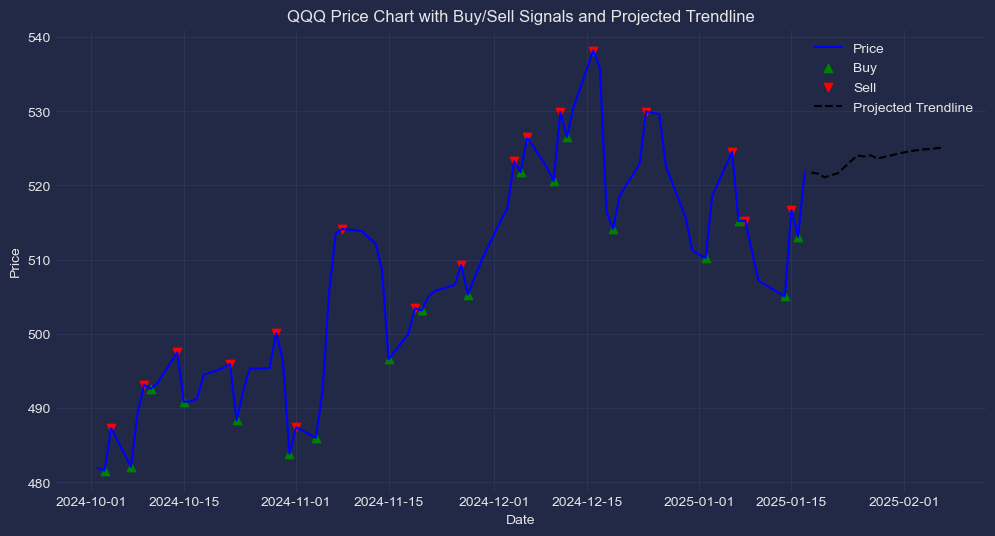

In [17]:
# LSTM
import matplotlib.pyplot as plt
import mplcyberpunk
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# User-defined parameters
ticker = "QQQ"  # Replace with your desired stock ticker
historical_days = 90  # Number of historical days to include
projection_days = 21  # Number of days to project
amplitude = 1.6  # Amplitude multiplier for the projection line
vertical_offset = 0.0  # Adjust starting point of projection, if necessary

# Style
plt.style.use("cyberpunk")

def find_peaks(prices, distance=1):
    peaks = []
    for i in range(distance, len(prices) - distance):
        if prices[i] > max(prices[i-distance:i]) and prices[i] > max(prices[i+1:i+1+distance]):
            peaks.append(i)
    return np.array(peaks), None

def find_troughs(prices, distance=1):
    troughs = []
    for i in range(distance, len(prices) - distance):
        if prices[i] < min(prices[i-distance:i]) and prices[i] < min(prices[i+1:i+1+distance]):
            troughs.append(i)
    return np.array(troughs), None

def prepare_data(prices, time_steps=10):
    """Prepare data for LSTM model."""
    X, y = [], []
    for i in range(len(prices) - time_steps):
        X.append(prices[i:i + time_steps])
        y.append(prices[i + time_steps])
    return np.array(X), np.array(y)

def plot_projection_chart(ticker, historical_days, projection_days, amplitude, vertical_offset):
    # Fetch historical data using yfinance
    end_date = datetime.today()
    start_date = end_date - timedelta(days=historical_days + projection_days)
    data = yf.download(ticker, start=start_date, end=end_date)

    # Extract dates and prices
    data.reset_index(inplace=True)
    dates = data['Date'].tolist()
    prices = data['Close'].values

    # Scale prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

    # Prepare training data for LSTM
    time_steps = 10
    X, y = prepare_data(prices_scaled, time_steps)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Build LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=20, batch_size=16, verbose=1)

    # Predict future prices
    last_sequence = prices_scaled[-time_steps:].reshape(1, time_steps, 1)
    future_prices = []
    for _ in range(projection_days):
        next_price = model.predict(last_sequence)[0][0]
        future_prices.append(next_price)
        last_sequence = np.append(last_sequence[:, 1:, :], [[[next_price]]], axis=1)

    future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1)).flatten()

    # Apply failsafe to align projection with historical data
    if future_prices[0] != prices[-1]:
        offset = prices[-1] - future_prices[0] + vertical_offset
        future_prices = [price + offset for price in future_prices]

    # Scale projection variability by amplitude
    future_prices = [prices[-1] + amplitude * (price - prices[-1]) for price in future_prices]

    # Detect peaks and troughs
    peaks, _ = find_peaks(prices)
    troughs, _ = find_troughs(prices)

    # Plot the historical data
    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices, label="Price", color="blue")

    # Plot buy and sell signals
    plt.scatter(np.array(dates)[troughs], np.array(prices)[troughs], color="green", marker="^", label="Buy")
    plt.scatter(np.array(dates)[peaks], np.array(prices)[peaks], color="red", marker="v", label="Sell")

    # Plot future projection
    future_dates = [dates[-1] + timedelta(days=i) for i in range(1, projection_days + 1)]
    plt.plot(future_dates, future_prices, '--', color="black", label="Projected Trendline")

    # Labels and display
    plt.title(f"{ticker} Price Chart with Buy/Sell Signals and Projected Trendline")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"F:\output\experimental\{ticker}_proj_lstm.png")
    plt.show()

# Run the function
plot_projection_chart(ticker, historical_days, projection_days, amplitude, vertical_offset)


<string>:84: SyntaxWarning: invalid escape sequence '\{'
<>:84: SyntaxWarning: invalid escape sequence '\{'
<>:84: SyntaxWarning: invalid escape sequence '\o'
<string>:84: SyntaxWarning: invalid escape sequence '\{'
<>:84: SyntaxWarning: invalid escape sequence '\{'
<>:84: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Spark\AppData\Local\Temp\ipykernel_14696\4008994308.py:84: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f"F:\output\experimental\{ticker}_proj_ml.png")
C:\Users\Spark\AppData\Local\Temp\ipykernel_14696\4008994308.py:84: SyntaxWarning: invalid escape sequence '\o'
  plt.savefig(f"F:\output\experimental\{ticker}_proj_ml.png")
[*********************100%%**********************]  1 of 1 completed


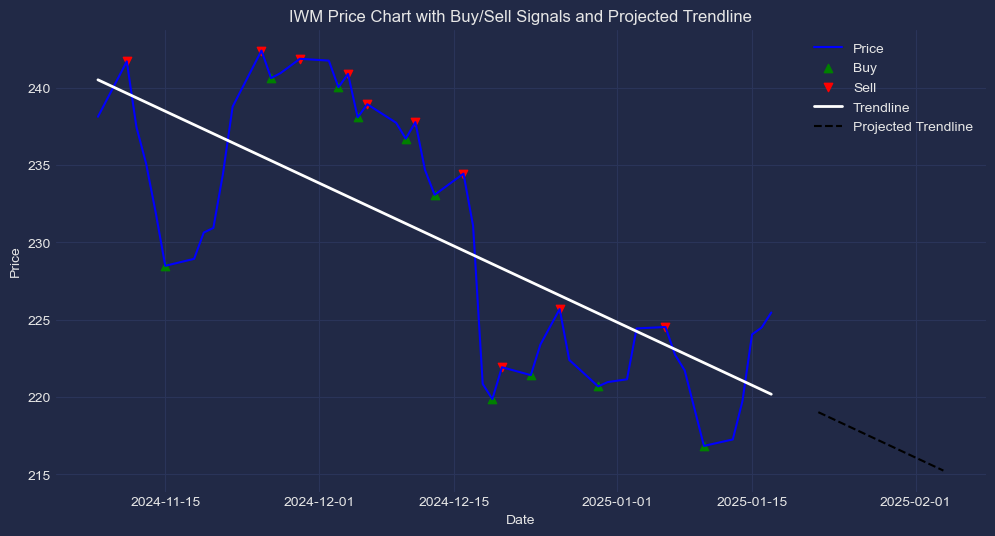

In [5]:
# Linear regression for simplicity

import matplotlib.pyplot as plt
import mplcyberpunk
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression

# User-defined parameters
ticker = "IWM"  # Replace with your desired stock ticker
historical_days = 60  # Number of historical days to include
projection_days = 14  # Number of days to project

# Style
plt.style.use("cyberpunk")

def find_peaks(prices, distance=1):
    peaks = []
    for i in range(distance, len(prices) - distance):
        if prices[i] > max(prices[i-distance:i]) and prices[i] > max(prices[i+1:i+1+distance]):
            peaks.append(i)
    return np.array(peaks), None

def find_troughs(prices, distance=1):
    troughs = []
    for i in range(distance, len(prices) - distance):
        if prices[i] < min(prices[i-distance:i]) and prices[i] < min(prices[i+1:i+1+distance]):
            troughs.append(i)
    return np.array(troughs), None

def plot_projection_chart(ticker, historical_days, projection_days):
    # Fetch historical data using yfinance
    end_date = datetime.today()
    start_date = end_date - timedelta(days=historical_days + projection_days)
    data = yf.download(ticker, start=start_date, end=end_date)

    # Extract dates and prices
    data.reset_index(inplace=True)
    dates = data['Date'].tolist()
    prices = data['Close'].tolist()

    # Detect peaks and troughs
    peaks, _ = find_peaks(prices)
    troughs, _ = find_troughs(prices)

    # Prepare data for regression
    historical_dates = np.array([pd.Timestamp(date).toordinal() for date in dates]).reshape(-1, 1)
    historical_prices = np.array(prices).reshape(-1, 1)

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(historical_dates, historical_prices)

    # Generate trendline for historical data
    trendline = model.predict(historical_dates)

    # Project future dates
    future_dates = [end_date + timedelta(days=i) for i in range(1, projection_days + 1)]
    future_ordinal_dates = np.array([pd.Timestamp(date).toordinal() for date in future_dates]).reshape(-1, 1)

    # Predict future prices
    future_trendline = model.predict(future_ordinal_dates)

    # Plot the historical data
    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices, label="Price", color="blue")

    # Plot buy and sell signals
    plt.scatter(np.array(dates)[troughs], np.array(prices)[troughs], color="green", marker="^", label="Buy")
    plt.scatter(np.array(dates)[peaks], np.array(prices)[peaks], color="red", marker="v", label="Sell")

    # Plot trendline
    plt.plot(dates, trendline, label="Trendline", color="white", linewidth=2)

    # Plot projected trendline
    plt.plot(future_dates, future_trendline, '--', color="black", label="Projected Trendline")

    # Labels and display
    plt.title(f"{ticker} Price Chart with Buy/Sell Signals and Projected Trendline")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"F:\output\experimental\{ticker}_proj_ml.png")
    plt.show()

# Run the function
plot_projection_chart(ticker, historical_days, projection_days)


<string>:81: SyntaxWarning: invalid escape sequence '\{'
<>:81: SyntaxWarning: invalid escape sequence '\{'
<>:81: SyntaxWarning: invalid escape sequence '\o'
<string>:81: SyntaxWarning: invalid escape sequence '\{'
<>:81: SyntaxWarning: invalid escape sequence '\{'
<>:81: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Spark\AppData\Local\Temp\ipykernel_14696\1788514561.py:81: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f"F:\output\experimental\{ticker}_proj.png")
C:\Users\Spark\AppData\Local\Temp\ipykernel_14696\1788514561.py:81: SyntaxWarning: invalid escape sequence '\o'
  plt.savefig(f"F:\output\experimental\{ticker}_proj.png")
[*********************100%%**********************]  1 of 1 completed


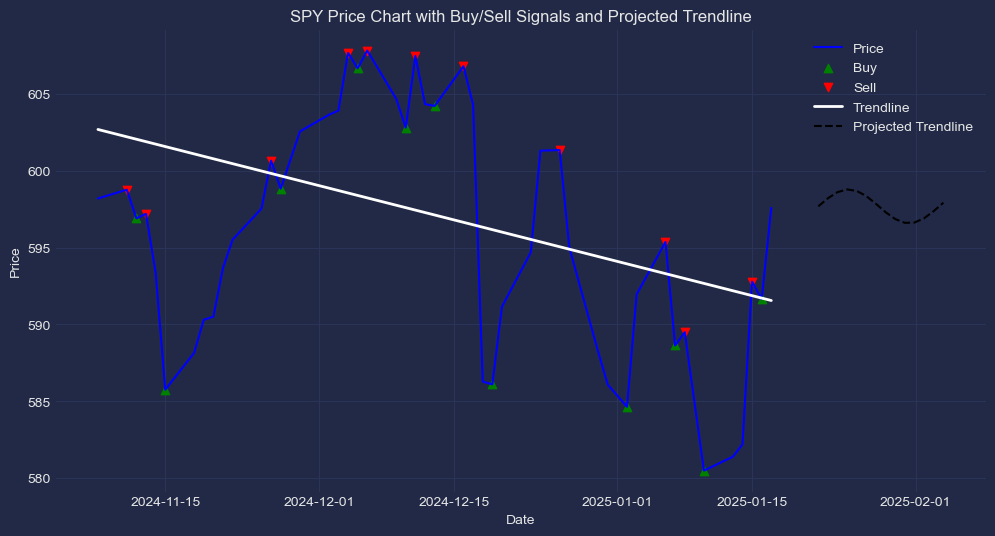

In [3]:
#Refined Script, No Machine Learning
import matplotlib.pyplot as plt
import mplcyberpunk
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import yfinance as yf

# User-defined parameters
ticker = "SPY"  # Replace with your desired stock ticker
historical_days = 60  # Number of historical days to include
projection_days = 14  # Number of days to project
amplitude = 1.1  # Amplitude of sine wave for projection
frequency = 0.5  # Frequency of sine wave for projection
vertical_offset = .1  # Vertical offset for projection starting point

# Style
plt.style.use("cyberpunk")

def find_peaks(prices, distance=1):
    peaks = []
    for i in range(distance, len(prices) - distance):
        if prices[i] > max(prices[i-distance:i]) and prices[i] > max(prices[i+1:i+1+distance]):
            peaks.append(i)
    return np.array(peaks), None

def find_troughs(prices, distance=1):
    troughs = []
    for i in range(distance, len(prices) - distance):
        if prices[i] < min(prices[i-distance:i]) and prices[i] < min(prices[i+1:i+1+distance]):
            troughs.append(i)
    return np.array(troughs), None

def plot_projection_chart(ticker, historical_days, projection_days, amplitude, frequency, vertical_offset):
    # Fetch historical data using yfinance
    end_date = datetime.today()
    start_date = end_date - timedelta(days=historical_days + projection_days)
    data = yf.download(ticker, start=start_date, end=end_date)

    # Extract dates and prices
    data.reset_index(inplace=True)
    dates = data['Date'].tolist()
    prices = data['Close'].tolist()

    # Detect peaks and troughs
    peaks, _ = find_peaks(prices)
    troughs, _ = find_troughs(prices)

    # Plot the historical data
    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices, label="Price", color="blue")

    # Plot buy and sell signals
    plt.scatter(np.array(dates)[troughs], np.array(prices)[troughs], color="green", marker="^", label="Buy")
    plt.scatter(np.array(dates)[peaks], np.array(prices)[peaks], color="red", marker="v", label="Sell")

    # Linear trend fitting
    all_signals = np.sort(np.concatenate((peaks, troughs)))
    trend_dates = np.array([pd.Timestamp(date).toordinal() for date in np.array(dates)[all_signals]])
    trend_prices = np.array(prices)[all_signals]
    trend_coeffs = np.polyfit(trend_dates, trend_prices, 1)

    # Generate the trendline
    trendline = np.polyval(trend_coeffs, np.array([pd.Timestamp(date).toordinal() for date in dates]))
    plt.plot(dates, trendline, label="Trendline", color="white", linewidth=2)

    # Project trendline into the future
    future_dates = [end_date + timedelta(days=i) for i in range(1, projection_days + 1)]
    future_trendline_start = prices[-1] + vertical_offset
    future_x = np.arange(projection_days)
    future_trendline = future_trendline_start + amplitude * np.sin(frequency * future_x)

    plt.plot(future_dates, future_trendline, '--', color="black", label="Projected Trendline")

    # Labels and display
    plt.title(f"{ticker} Price Chart with Buy/Sell Signals and Projected Trendline")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"F:\output\experimental\{ticker}_proj.png")
    plt.show()

# Run the function
plot_projection_chart(ticker, historical_days, projection_days, amplitude, frequency, vertical_offset)
